# Agentic Document Assistant - Architecture Overview

In [2]:
pip install langgraph



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


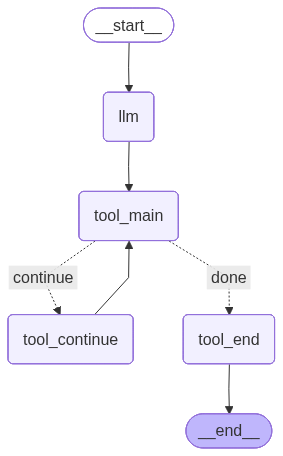

In [4]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display

# Fake state for the graph (needed by LangGraph)
class AgentState(dict):
    pass

# === Create the graph ===
workflow = StateGraph(AgentState)

# === NODES ===
workflow.add_node("llm", lambda x: x)
workflow.add_node("tool_main", lambda x: x)         # main tool hub
workflow.add_node("tool_continue", lambda x: x)     # branch if LLM decides more tools needed
workflow.add_node("tool_end", lambda x: x)          # final tool before ending

# === EDGES ===
workflow.add_edge(START, "llm")
workflow.add_edge("llm", "tool_main")

# === CONDITIONAL BRANCHING (like your capture) ===
def should_continue(state):
    """Dummy condition for the graph rendering.
    In reality: LLM decides if more tools are needed."""
    # Only for visualization — returns the branch names
    return "continue"

workflow.add_conditional_edges(
    "tool_main",
    should_continue,
    {
        "continue": "tool_continue",   # branch like in the screenshot
        "done": "tool_end"             # branch directly to the end
    }
)

# Loop back (like screenshot: tool template → tool doc)
workflow.add_edge("tool_continue", "tool_main")

# Final tool step → end
workflow.add_edge("tool_end", END)

# === Compile & Display ===
graph = workflow.compile()
display(graph)
